<a href="https://colab.research.google.com/github/Stdcoders/Codsoft/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#loading the data into the program
titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     0        S  


In [ ]:
titanic.shape

(891, 12)

In [ ]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#drop the cabin column
titanic = titanic.drop(columns='Cabin', axis=1)
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
#replacing missing values with mean value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
#mode value of embarked column
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#replacing the missing values in embarked column with mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
print(titanic['Embarked'].mode()[0])

S


In [ ]:
#statistics of data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
#data visualization
sns.set()
print(sns.__version__)


0.13.1


<Axes: xlabel='Survived', ylabel='count'>

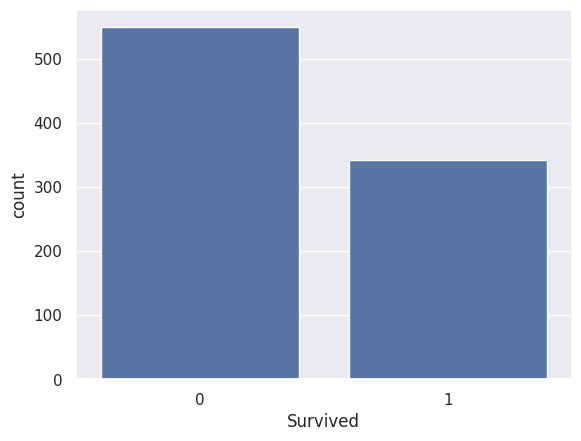

In [ ]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

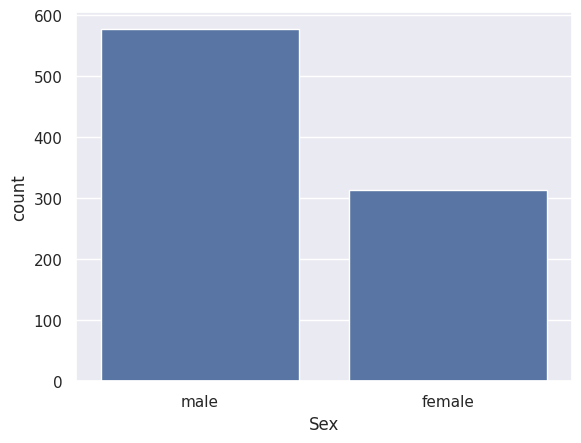

In [ ]:
sns.countplot(x='Sex', data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

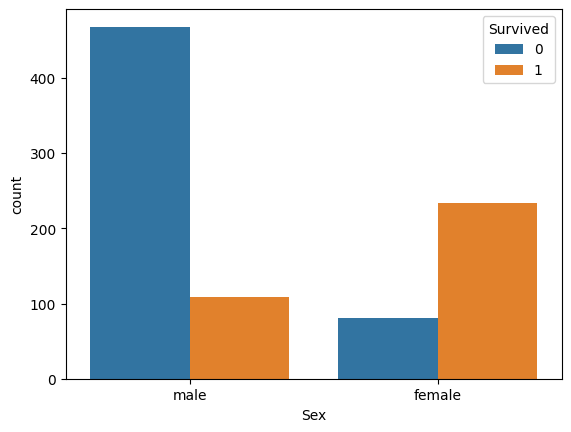

In [ ]:
#number of survivers based on gender
sns.countplot(x='Sex', hue='Survived', data=titanic)


<Axes: xlabel='Survived', ylabel='count'>

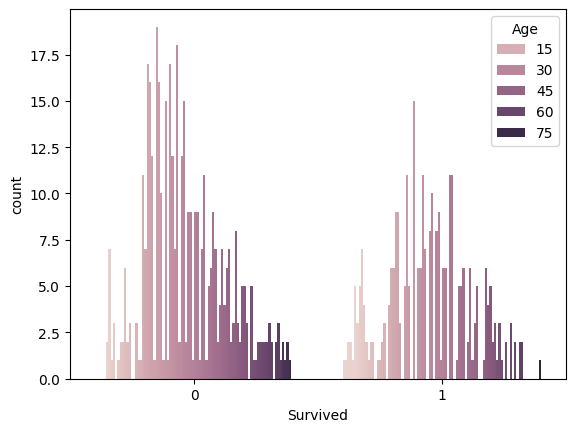

In [ ]:
#survival based on age
sns.countplot(x='Survived', hue='Age', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

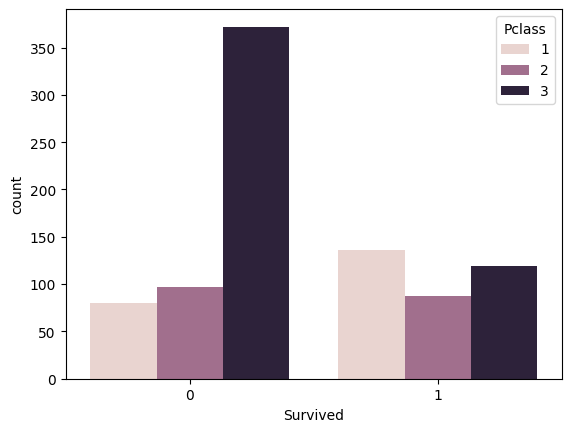

In [ ]:
#survival based on class
sns.countplot(x='Survived', hue='Pclass', data=titanic)

In [ ]:
#replacing males with 0 and females with 1
titanic['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [ ]:
#dropping the name column
titanic = titanic.drop(columns='Name', axis=1)


In [ ]:
#replacing S with 0, C with 1 and Q with 2 in the 'Embarked' Column
titanic['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0


In [ ]:
R = titanic.drop(columns=['PassengerId','Ticket','Fare','Survived','Cabin'])
S = titanic['Survived']

In [ ]:

R.fillna(R.mean(), inplace=True)
print(R)

     Pclass  Sex        Age  SibSp  Parch  Embarked
0         3    0  22.000000      1      0       0.0
1         1    1  38.000000      1      0       1.0
2         3    1  26.000000      0      0       0.0
3         1    1  35.000000      1      0       0.0
4         3    0  35.000000      0      0       0.0
..      ...  ...        ...    ...    ...       ...
886       2    0  27.000000      0      0       0.0
887       1    1  19.000000      0      0       0.0
888       3    1  29.699118      1      2       0.0
889       1    0  26.000000      0      0       1.0
890       3    0  32.000000      0      0       2.0

[891 rows x 6 columns]


In [ ]:
print(R.isnull().sum())
print(S)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
#training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(R, S, test_size=0.2, random_state=2)

In [ ]:
from re import X
# Impute missing values in X_train and X_test after the split
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression()
model.fit(X_train, Y_train)  # Now fit the model with imputed data

LogisticRegression()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(R.shape)

(712, 6)
(179, 6)
(891, 6)


In [ ]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

#testing data prediction
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8117977528089888
Accuracy score of the test data :  0.7877094972067039
